<a href="https://colab.research.google.com/github/prabhaM07/intern/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_rel
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore
from scipy.stats import probplot
from xgboost import XGBClassifier
import math

READ DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/diabetes_prediction_dataset.csv')

In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
52057,Female,69.0,0,0,No Info,31.29,4.5,140,0
64210,Female,26.0,0,0,former,22.70,3.5,126,0
5495,Female,67.0,0,0,No Info,32.77,5.8,130,0
68249,Male,80.0,0,0,ever,27.32,4.5,160,0
70511,Male,28.0,0,0,never,27.32,6.6,160,0


Gender is not necessary lets drop it

In [ ]:
df = df.drop('gender', axis=1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB
None


Check for missing values

In [ ]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

*Check* duplicates

In [ ]:
df.duplicated().sum()

6389

In [ ]:
df = df.drop_duplicates()
df.shape[0]

93611

In [ ]:
df.replace('No Info', float('nan'), inplace=True)

Correlation Matrix

<ipython-input-12-bcfbb7afc424>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'RdPu')


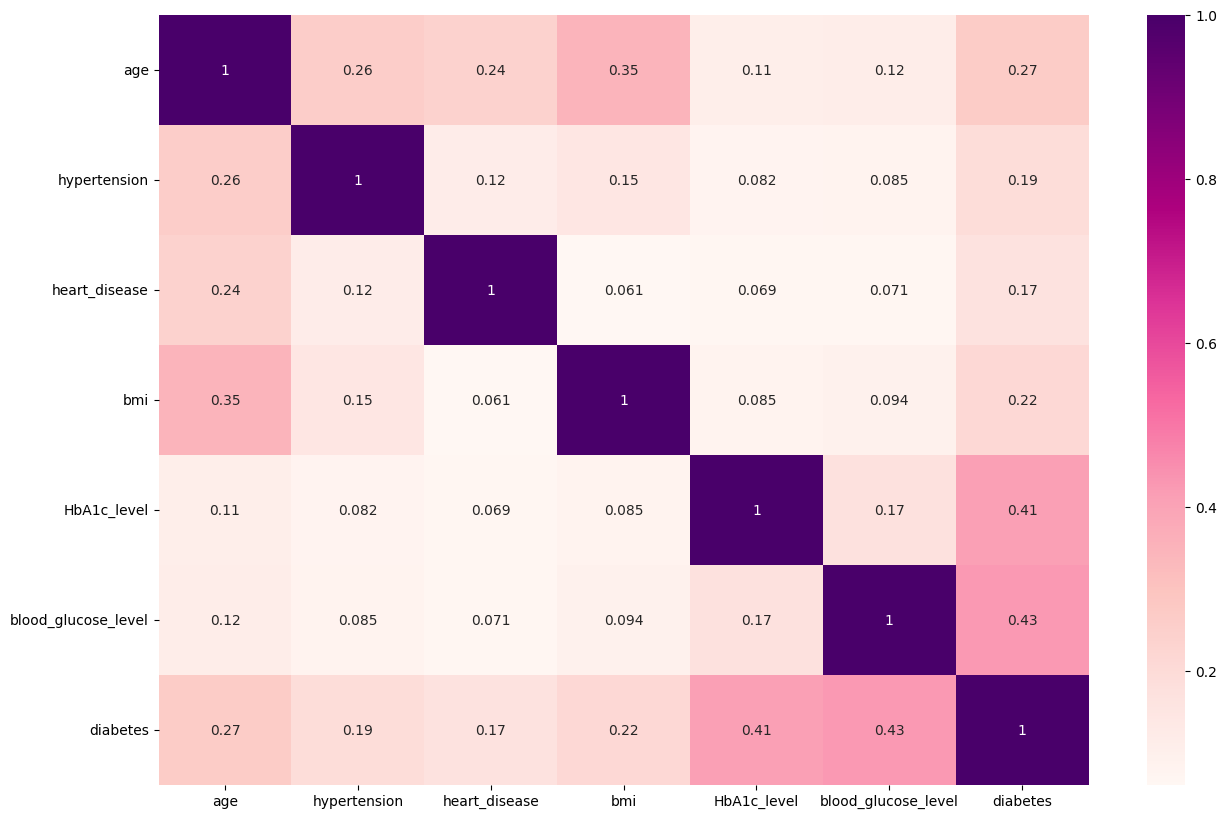

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdPu')
plt.show()

In [ ]:
print(df.columns)

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


Data Visualization

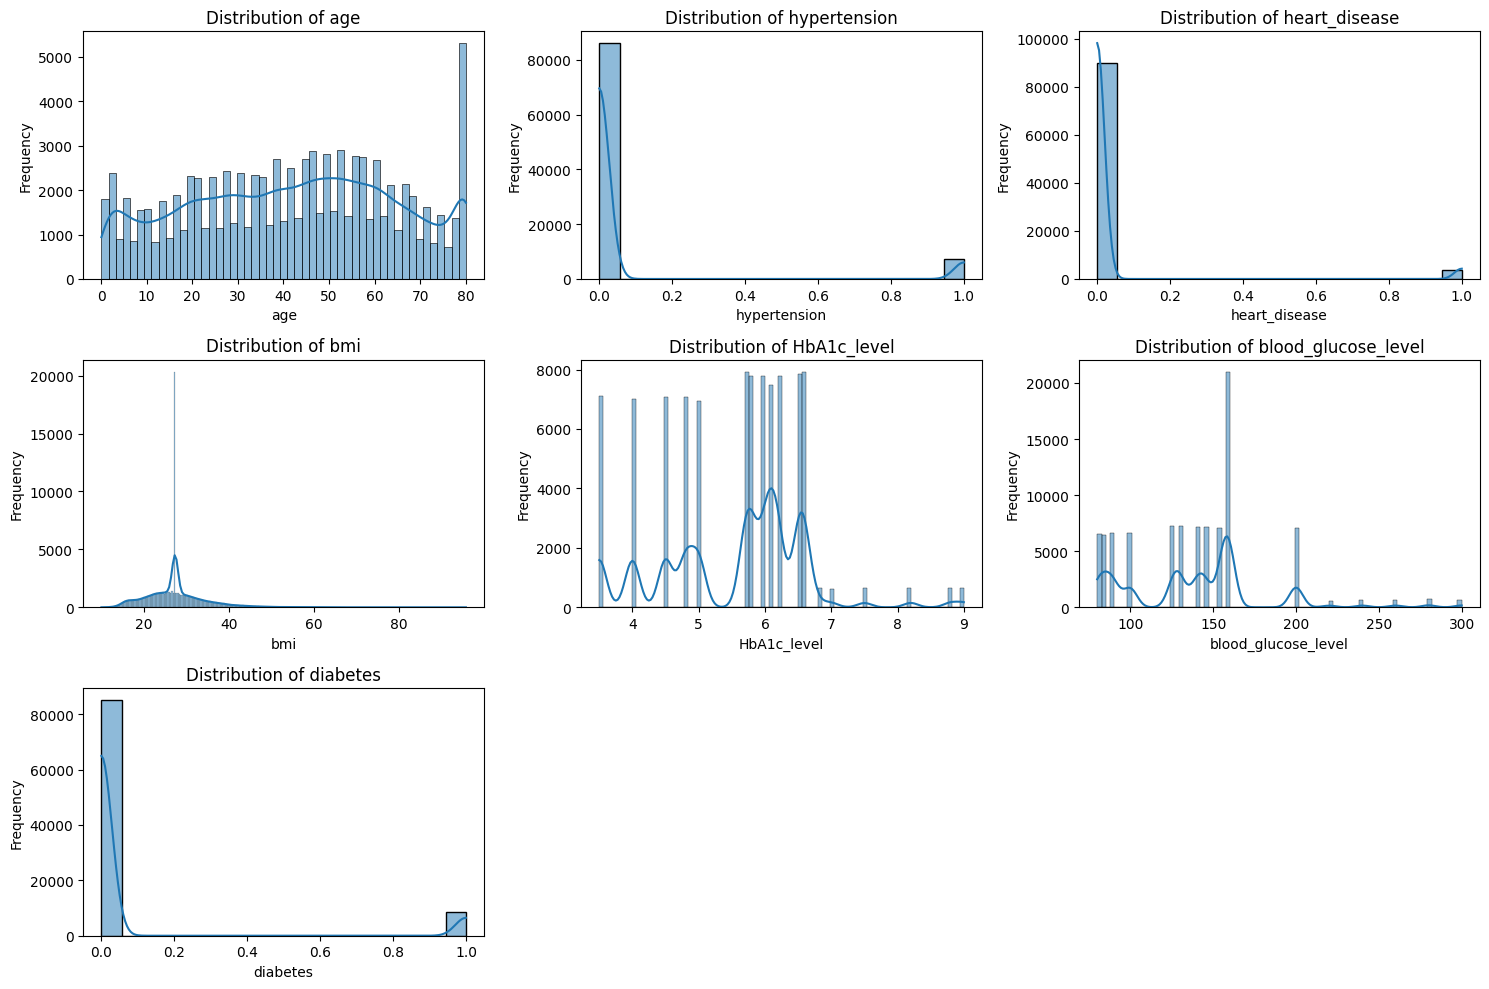

In [ ]:
# Distribution plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


One hot encoding

In [ ]:
print(df['smoking_history'].unique())

['never' nan 'current' 'former' 'ever' 'not current']


In [ ]:
categorical_cols = ['smoking_history']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,93611.0,41.833746,22.485157,0.08,24.00,43.00,60.000,80.00
hypertension,93611.0,0.079606,0.270684,0.00,0.00,0.00,0.000,1.00
heart_disease,93611.0,0.041747,0.200012,0.00,0.00,0.00,0.000,1.00
bmi,93611.0,27.322993,6.857632,10.01,23.24,27.32,30.035,95.69
HbA1c_level,93611.0,5.536296,1.075454,3.50,4.80,5.80,6.200,9.00
blood_glucose_level,93611.0,138.331670,41.052424,80.00,100.00,140.00,159.000,300.00
diabetes,93611.0,0.090481,0.286871,0.00,0.00,0.00,0.000,1.00
smoking_history_ever,93611.0,0.042634,0.202031,0.00,0.00,0.00,0.000,1.00
smoking_history_former,93611.0,0.098824,0.298427,0.00,0.00,0.00,0.000,1.00
smoking_history_never,93611.0,0.362116,0.480615,0.00,0.00,0.00,1.000,1.00


Check for Class Imbalance and sampling

In [ ]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
target_distribution = y.value_counts(normalize=True) * 100

# Print the percentage distribution
target_distribution

0    90.951918
1     9.048082
Name: diabetes, dtype: float64

In [ ]:
# Assuming 'diabetes' is the target column
target_frequency = df['diabetes'].value_counts()

print(target_frequency)


0    85141
1     8470
Name: diabetes, dtype: int64


Handling imbalance dataset by applying SMOTE

In [ ]:
# by applying SMOTE

from imblearn.over_sampling import SMOTE

# Example: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
target_distribution = y_resampled.value_counts(normalize=True) * 100

# Print the percentage distribution
target_distribution

0    50.0
1    50.0
Name: diabetes, dtype: float64

Removing Outlier using Z-score

In [ ]:
X_resampled.sample(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
114239,19.233505,0,0,24.430964,6.966495,145,0,0,0,0
12111,80.000000,0,0,26.300000,6.500000,200,0,1,0,0
156866,53.885474,0,0,30.592123,7.000000,140,0,0,0,0
129618,51.244074,0,0,44.811435,6.364574,130,0,0,0,0
26186,6.000000,0,0,15.510000,5.700000,126,0,0,0,0


In [ ]:
df = pd.concat([X_resampled, y_resampled], axis=1)


In [ ]:
numerical_cols = ['age','bmi','HbA1c_level','blood_glucose_level']

z_scores = zscore(df[numerical_cols])

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 4

# Identify and remove outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)
df = df[~outliers_mask]
row=df.shape[0]
print(row)
df=df.dropna()
row=df.shape[0]
row

169817


169817

Slipt Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Training Models

Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.10
Linear Regression Mean Absolute Error: 0.26


KNN

In [ ]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # You can add more values to test
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train,y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.9431247614293684
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     16947
           1       0.92      0.98      0.95     17110

    accuracy                           0.94     34057
   macro avg       0.95      0.94      0.94     34057
weighted avg       0.95      0.94      0.94     34057



Decision Tree

In [ ]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.9718706873770444
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     16947
           1       0.98      0.97      0.97     17110

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057



Random forest classifier

In [ ]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.9302933317673312
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     16947
           1       0.92      0.95      0.93     17110

    accuracy                           0.93     34057
   macro avg       0.93      0.93      0.93     34057
weighted avg       0.93      0.93      0.93     34057



 AdaBoost Classifier

In [ ]:
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

# Create and train the AdaBoost Classifier using the Decision Tree as base estimator
ada_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=50, random_state=0)

# Train the AdaBoost model
ada_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
report_ada = classification_report(y_test, y_pred_ada)

print("AdaBoost Model Accuracy:", accuracy_ada)
print("AdaBoost Classification Report:\n", report_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Model Accuracy: 0.9723698505446751
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     16947
           1       0.98      0.97      0.97     17110

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057

